In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

import tqdm as tqdm

In [2]:
df = pd.read_csv('c://data/df/controlwork/train.csv')
df_val = pd.read_csv('c://data/df/controlwork/validation.csv')

In [3]:
df.shape

(7595, 21)

In [4]:
df_val.shape

(2532, 20)

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [6]:
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,715630983,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,...,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,713643858,53,F,1,College,Married,$40K - $60K,Blue,43,4,...,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,708334158,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,...,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,711033408,50,F,2,High School,Married,Less than $40K,Blue,36,5,...,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,711368283,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,...,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,7595.0,7.393515e+08,3.698152e+07,708082083.0,7.130482e+08,7.179543e+08,7.741359e+08,8.282989e+08
Customer_Age,7595.0,4.630296e+01,7.951111e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,7595.0,2.353259e+00,1.298548e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,7595.0,3.592943e+01,7.899472e+00,13.0,3.200000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,7595.0,3.814352e+00,1.547264e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,7595.0,2.354575e+00,1.009706e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,7595.0,2.458328e+00,1.105780e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,7595.0,8.654540e+03,9.102154e+03,1438.3,2.554000e+03,4.562000e+03,1.110400e+04,3.451600e+04
Total_Revolving_Bal,7595.0,1.165152e+03,8.137423e+02,0.0,4.530000e+02,1.285000e+03,1.779000e+03,2.517000e+03
Avg_Open_To_Buy,7595.0,7.489388e+03,9.101372e+03,3.0,1.352500e+03,3.492000e+03,9.894000e+03,3.451600e+04


In [8]:
# Типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7595 non-null   int64  
 1   Customer_Age              7595 non-null   int64  
 2   Gender                    7595 non-null   object 
 3   Dependent_count           7595 non-null   int64  
 4   Education_Level           7595 non-null   object 
 5   Marital_Status            7595 non-null   object 
 6   Income_Category           7595 non-null   object 
 7   Card_Category             7595 non-null   object 
 8   Months_on_book            7595 non-null   int64  
 9   Total_Relationship_Count  7595 non-null   int64  
 10  Months_Inactive_12_mon    7595 non-null   int64  
 11  Contacts_Count_12_mon     7595 non-null   int64  
 12  Credit_Limit              7595 non-null   float64
 13  Total_Revolving_Bal       7595 non-null   int64  
 14  Avg_Open

In [9]:
df.drop('CLIENTNUM', axis =1, inplace=True )
cl = df_val.CLIENTNUM # Пригодится для записи в csv
df_val.drop('CLIENTNUM', axis =1, inplace=True )
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,31,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,4598.0,0,4598.0,0.439,6317,77,0.833,0.000,Attrited Customer
1,53,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,1525.0,1411,114.0,0.660,1911,47,0.958,0.925,Existing Customer
2,46,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,2,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070,Existing Customer
3,50,F,2,High School,Married,Less than $40K,Blue,36,5,1,2,9355.0,1626,7729.0,0.701,1230,28,0.867,0.174,Existing Customer
4,39,M,2,Unknown,Married,$80K - $120K,Blue,27,3,3,2,34516.0,1629,32887.0,1.078,3448,53,1.038,0.047,Existing Customer


In [10]:
df.nunique()

Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                5017
Total_Revolving_Bal         1852
Avg_Open_To_Buy             5493
Total_Amt_Chng_Q4_Q1        1081
Total_Trans_Amt             4311
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          787
Avg_Utilization_Ratio        945
Attrition_Flag                 2
dtype: int64

In [11]:
# оценка корреляции между фичами
def correl(Xtrain, thresh):
    cor = Xtrain.corr()
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    all_cor = c1[c1.values != 1]
    return all_cor[abs(all_cor) > thresh]

print(correl(df, 0.5))

Credit_Limit           Avg_Open_To_Buy          0.996003
Total_Trans_Amt        Total_Trans_Ct           0.808182
Customer_Age           Months_on_book           0.784460
Total_Revolving_Bal    Avg_Utilization_Ratio    0.619816
Avg_Utilization_Ratio  Avg_Open_To_Buy         -0.537792
dtype: float64


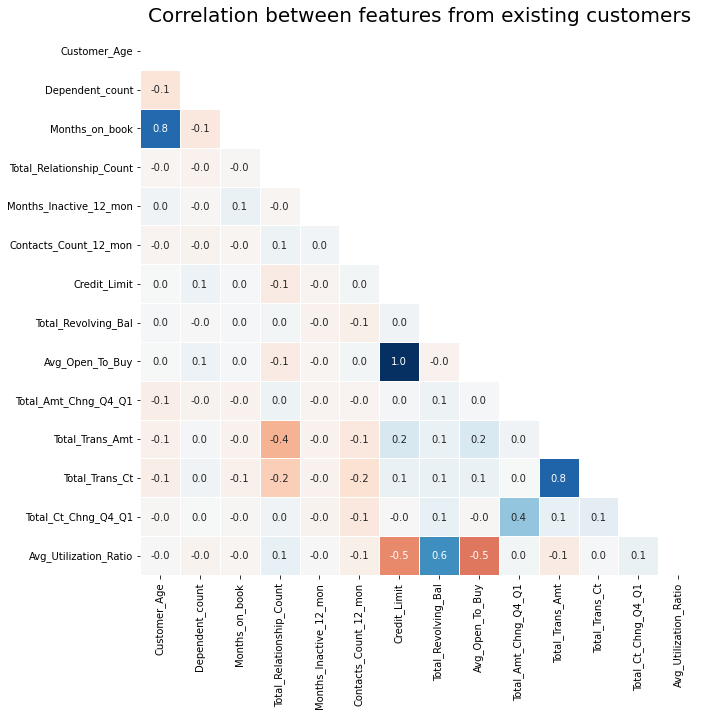

In [12]:
# Посмотрим корреляцию числовых признаков. Уберем коррелирующие

corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [13]:
df.drop('Avg_Open_To_Buy', axis =1, inplace=True )
df_val.drop('Avg_Open_To_Buy', axis =1, inplace=True )

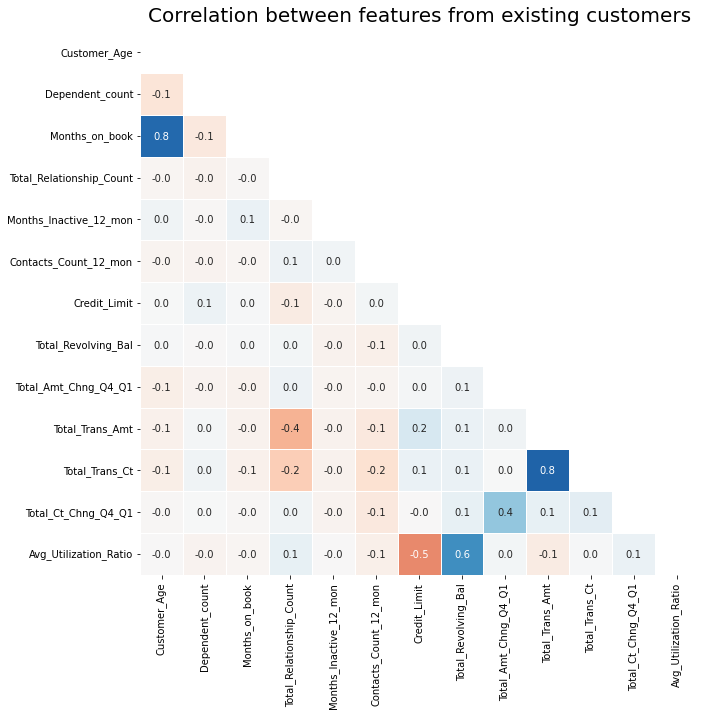

In [14]:
corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [15]:
#df.drop('Total_Trans_Ct', axis =1, inplace=True )
# Удаление данного признака оч сильно просаживает результат. Оставляем

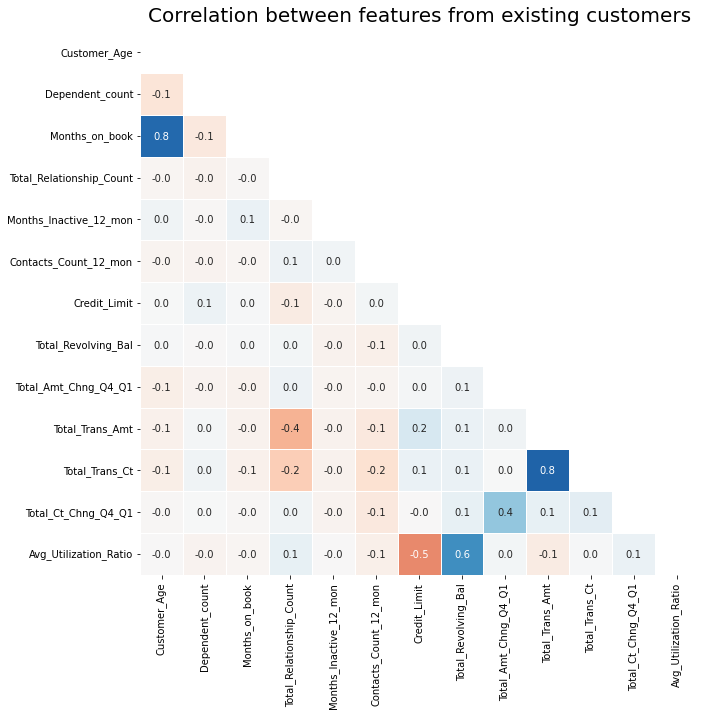

In [16]:
corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [17]:
df.drop('Customer_Age', axis =1, inplace=True )
df_val.drop('Customer_Age', axis =1, inplace=True )

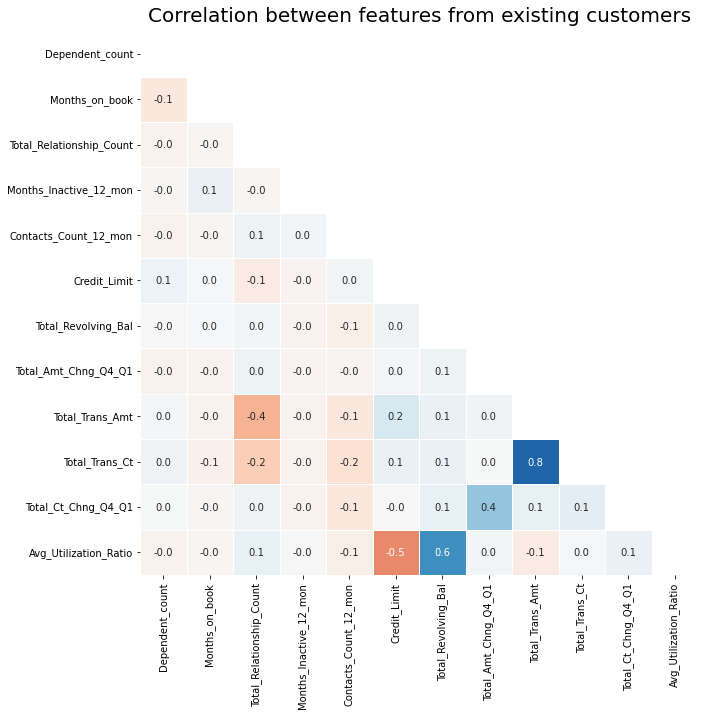

In [18]:
corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [19]:
df.drop('Avg_Utilization_Ratio', axis =1, inplace=True )
df_val.drop('Avg_Utilization_Ratio', axis =1, inplace=True )

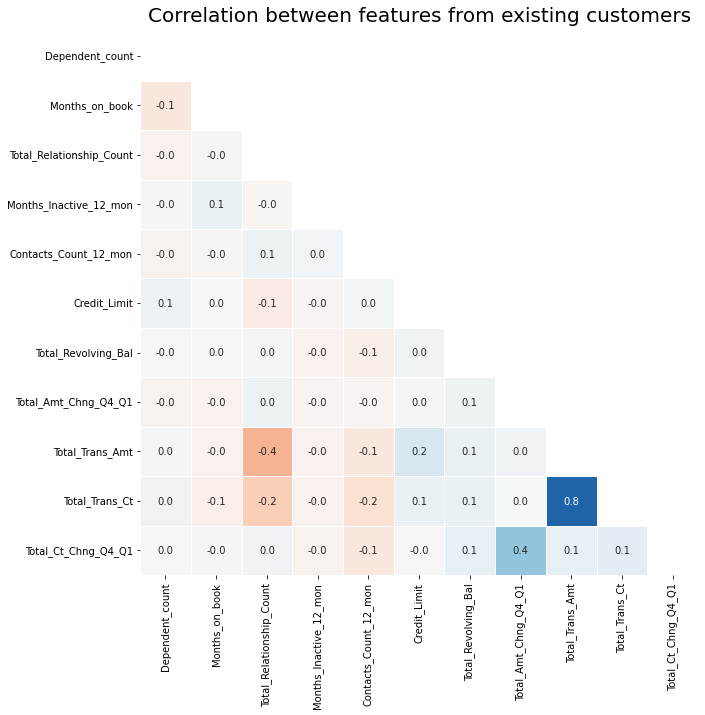

In [20]:
corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [21]:
#df.drop('Total_Amt_Chng_Q4_Q1', axis =1, inplace=True )

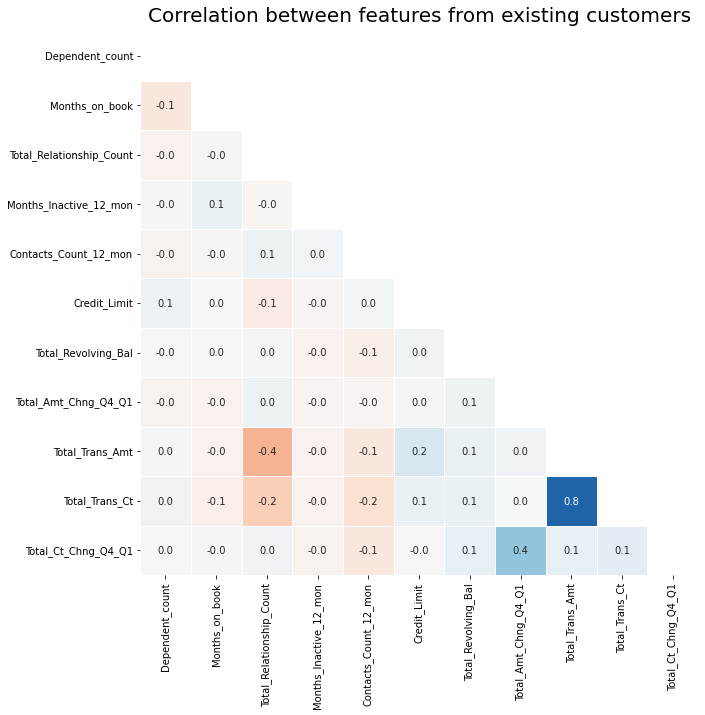

In [22]:
corr =  df.corr()
non_churners_mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=non_churners_mask, linewidths = 0.5, cmap= 'RdBu', annot= True, cbar=False, fmt = '.1f', vmin= -1, vmax=1)
plt.title("Correlation between features from existing customers", size=20, pad=10)
plt.show()

In [23]:
# Займемся категориальными признаками

#df.Marital_Status.unique()
#df.Income_Category.unique()
#df.Card_Category.unique()


In [24]:
df.Education_Level.unique()

array(['Graduate', 'College', 'High School', 'Unknown', 'Uneducated',
       'Doctorate', 'Post-Graduate'], dtype=object)

In [25]:
dups = df.pivot_table(index = ['Education_Level'], aggfunc ='size')
print(dups)

Education_Level
College           752
Doctorate         335
Graduate         2322
High School      1518
Post-Graduate     373
Uneducated       1126
Unknown          1169
dtype: int64


In [26]:
df.Marital_Status.unique()

array(['Single', 'Married', 'Divorced', 'Unknown'], dtype=object)

In [27]:
dups = df.pivot_table(index = ['Marital_Status'], aggfunc ='size')
print(dups)

Marital_Status
Divorced     574
Married     3480
Single      2987
Unknown      554
dtype: int64


In [28]:
df.Income_Category.unique()

array(['Less than $40K', '$40K - $60K', '$80K - $120K', 'Unknown',
       '$60K - $80K', '$120K +'], dtype=object)

In [29]:
dups = df.pivot_table(index = ['Income_Category'], aggfunc ='size')
print(dups)

Income_Category
$120K +            558
$40K - $60K       1309
$60K - $80K       1047
$80K - $120K      1160
Less than $40K    2675
Unknown            846
dtype: int64


In [30]:
df['Gender'] = df["Gender"].astype('category')
df['Gender'] = df["Gender"].astype('category')
df['Card_Category'] = df["Card_Category"].astype('category')
df['Education_Level'] = df["Education_Level"].astype('category')
df['Marital_Status'] = df["Marital_Status"].astype('category')
df['Income_Category'] = df["Income_Category"].astype('category')

In [31]:
df_val['Gender'] = df_val["Gender"].astype('category')
df_val['Gender'] = df_val["Gender"].astype('category')
df_val['Card_Category'] = df_val["Card_Category"].astype('category')
df_val['Education_Level'] = df_val["Education_Level"].astype('category')
df_val['Marital_Status'] = df_val["Marital_Status"].astype('category')
df_val['Income_Category'] = df_val["Income_Category"].astype('category')

In [32]:
# сделаем encoding категориальных признаков

gender = pd.get_dummies(df['Gender'], drop_first=False)
education = pd.get_dummies(df['Education_Level'], drop_first = False)
marital = pd.get_dummies(df['Marital_Status'], drop_first = False)
income = pd.get_dummies(df['Income_Category'], drop_first=False)
card = pd.get_dummies(df['Card_Category'], drop_first=False)

In [33]:
# Добавим эти столбцы в датасет
df = pd.concat([df, gender, education, marital, income, card], axis = 1)

df.head(3)

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
0,F,0,Graduate,Single,Less than $40K,Blue,21,4,2,3,...,0,0,0,0,1,0,1,0,0,0
1,F,1,College,Married,$40K - $60K,Blue,43,4,4,2,...,0,1,0,0,0,0,1,0,0,0
2,F,3,Graduate,Divorced,Less than $40K,Blue,34,4,2,4,...,0,0,0,0,1,0,1,0,0,0


In [34]:
# Тоже для df_val

gender = pd.get_dummies(df_val['Gender'], drop_first=False)
education = pd.get_dummies(df_val['Education_Level'], drop_first = False)
marital = pd.get_dummies(df_val['Marital_Status'], drop_first = False)
income = pd.get_dummies(df_val['Income_Category'], drop_first=False)
card = pd.get_dummies(df_val['Card_Category'], drop_first=False)

df_val = pd.concat([df_val, gender, education, marital, income, card], axis = 1)

In [35]:
# Удалим исходные столбцы
df.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis = 1, inplace = True)
df_val.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis = 1, inplace = True)
datatypes = df.dtypes 
print(datatypes)

Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Attrition_Flag               object
F                             uint8
M                             uint8
College                       uint8
Doctorate                     uint8
Graduate                      uint8
High School                   uint8
Post-Graduate                 uint8
Uneducated                    uint8
Unknown                       uint8
Divorced                      uint8
Married                       uint8
Single                        uint8
Unknown                       uint8
$120K +                       uint8
$40K - $60K                   uint8
$60K - $80K                 

In [36]:
# заменил на числа

df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df['Attrition_Flag'].value_counts()

0    6375
1    1220
Name: Attrition_Flag, dtype: int64

In [37]:
y = df['Attrition_Flag']
X = df.drop('Attrition_Flag', axis =1 )
y

0       1
1       0
2       0
3       0
4       0
       ..
7590    0
7591    0
7592    0
7593    0
7594    0
Name: Attrition_Flag, Length: 7595, dtype: int64

In [38]:
# Удалим unknown
X.drop('Unknown', axis =1, inplace=True)
df_val.drop('Unknown', axis =1, inplace=True)
X.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
0,0,21,4,2,3,4598.0,0,0.439,6317,77,...,1,0,0,0,0,1,1,0,0,0
1,1,43,4,4,2,1525.0,1411,0.660,1911,47,...,0,0,1,0,0,0,1,0,0,0
2,3,34,4,2,4,9863.0,686,0.581,3068,58,...,0,0,0,0,0,1,1,0,0,0
3,2,36,5,1,2,9355.0,1626,0.701,1230,28,...,0,0,0,0,0,1,1,0,0,0
4,2,27,3,3,2,34516.0,1629,1.078,3448,53,...,0,0,0,0,1,0,1,0,0,0


In [39]:
# Поделим
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)


In [40]:
#y_test.astype(dtype = 'int64')
y_train.dtype

dtype('int64')

In [41]:
from sklearn.utils.class_weight import compute_class_weight

# классы
classes = np.unique(y_train)

# вычисленные веса классов
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# в словарь
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.5956862745098039, 1: 3.112704918032787}

In [42]:
#Нормализуем
X_train['Credit_Limit'] = MinMaxScaler().fit_transform(np.array(X_train['Credit_Limit']).reshape(-1,1))
X_train['Total_Revolving_Bal'] = MinMaxScaler().fit_transform(np.array(X_train['Total_Revolving_Bal']).reshape(-1,1))
X_train['Total_Amt_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(X_train['Total_Amt_Chng_Q4_Q1']).reshape(-1,1))
X_train['Total_Trans_Amt'] = MinMaxScaler().fit_transform(np.array(X_train['Total_Trans_Amt']).reshape(-1,1))
X_train['Total_Trans_Ct'] = MinMaxScaler().fit_transform(np.array(X_train['Total_Trans_Ct']).reshape(-1,1))
X_train['Total_Ct_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(X_train['Total_Ct_Chng_Q4_Q1']).reshape(-1,1))

In [43]:
X_test['Credit_Limit'] = MinMaxScaler().fit_transform(np.array(X_test['Credit_Limit']).reshape(-1,1))
X_test['Total_Revolving_Bal'] = MinMaxScaler().fit_transform(np.array(X_test['Total_Revolving_Bal']).reshape(-1,1))
X_test['Total_Amt_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(X_test['Total_Amt_Chng_Q4_Q1']).reshape(-1,1))
X_test['Total_Trans_Amt'] = MinMaxScaler().fit_transform(np.array(X_test['Total_Trans_Amt']).reshape(-1,1))
X_test['Total_Trans_Ct'] = MinMaxScaler().fit_transform(np.array(X_test['Total_Trans_Ct']).reshape(-1,1))
X_test['Total_Ct_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(X_test['Total_Ct_Chng_Q4_Q1']).reshape(-1,1))

In [44]:
df_val['Credit_Limit'] = MinMaxScaler().fit_transform(np.array(df_val['Credit_Limit']).reshape(-1,1))
df_val['Total_Revolving_Bal'] = MinMaxScaler().fit_transform(np.array(df_val['Total_Revolving_Bal']).reshape(-1,1))
df_val['Total_Amt_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(df_val['Total_Amt_Chng_Q4_Q1']).reshape(-1,1))
df_val['Total_Trans_Amt'] = MinMaxScaler().fit_transform(np.array(df_val['Total_Trans_Amt']).reshape(-1,1))
df_val['Total_Trans_Ct'] = MinMaxScaler().fit_transform(np.array(df_val['Total_Trans_Ct']).reshape(-1,1))
df_val['Total_Ct_Chng_Q4_Q1'] = MinMaxScaler().fit_transform(np.array(df_val['Total_Ct_Chng_Q4_Q1']).reshape(-1,1))

In [45]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, auc

In [46]:
catboost_model_main_feat = CatBoostClassifier(
                                    custom_metric=['AUC'], 
                                    eval_metric='F1',
                                    random_seed=42,
                                    #early_stopping_rounds = 50,
                                    #depth = 9,
                                    logging_level='Silent',
                                    class_weights=class_weights
                                    )

In [47]:
# Обучим
catboost_model_main_feat.fit(X_train, y_train,
                   eval_set = (X_test, y_test),
                   verbose=False,
                   #cat_features=cat_features,
                   #plot=True
                   )

In [48]:
y_pred = np.argmax(catboost_model_main_feat.predict_proba(X_test), axis=1)


In [49]:
f1_score(y_test, y_pred) 

0.8812877263581489

In [50]:
roc_auc_score(y_test, y_pred)

0.9354371584699454

In [51]:
# Попробуем другой классификатор
from xgboost import XGBClassifier


In [52]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.96


In [54]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 
print(cm)

[[1265   10]
 [  47  197]]


In [55]:
f1_score(y_test, y_pred)

0.8736141906873615

In [56]:
# результат у CatBoostClassifier немного выше, берём его.  F1 = 0.8812

In [57]:
val_pred = np.argmax(catboost_model_main_feat.predict_proba(df_val), axis=1)
#val_pred = xgbc.predict(df_val)

In [58]:
#val_pred = pd.DataFrame(val_pred)
#val_pred.value_counts()

In [59]:
final = pd.DataFrame({'client_id': cl, 'churn': val_pred})
final

,client_id,churn
0,719682183,1
1,711341433,0
2,716154258,0
3,779749908,1
4,710854008,0
...,...,...
2527,710268858,0
2528,714130233,0
2529,708823908,0
2530,771045708,0


In [60]:
final.to_csv('7_result_orlov.csv', index=False)

In [61]:
final_ = pd.read_csv('7_result_orlov.csv', index_col = 'client_id')
final_

,churn
client_id,
719682183,1
711341433,0
716154258,0
779749908,1
710854008,0
...,...
710268858,0
714130233,0
708823908,0
